In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from PIL import Image

In [4]:
def line_enhancement_and_blur(imgBase, imgBody, edgeMethod="laplacian",kernelSize = 5, alpha = 0.1):
    if(edgeMethod == "laplacian"):
        edgeImg = cv2.Laplacian(imgBase,cv2.CV_8U)
    if(edgeMethod == "sobelX"):
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,1,0,ksize=5)
    else:
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,0,1,ksize=5)
        
    blur = cv2.blur(edgeImg,(kernelSize,kernelSize),0)
    height, width = imgBase.shape[:2]
    imgBody =cv2.resize(imgBody,(width,height))
    
    beta=1-alpha
    gamma=0
    dst = np.uint8(alpha*(blur)+beta*(imgBody))
    dst = cv2.applyColorMap(dst,cv2.COLORMAP_JET)
    plt.subplot(121), plt.imshow(dst)
    return dst

In [10]:
def colourise_base_and_blur(imgBase, imgBody, edgeMethod="laplacian",kernelSize = 5, alpha = 0.1):
    if(edgeMethod == "laplacian"):
        edgeImg = cv2.Laplacian(imgBase,cv2.CV_8U)
    if(edgeMethod == "sobelX"):
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,1,0,ksize=5)
    if(edgeMethod == "sobelY"):
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,0,1,ksize=5)
    
    height, width = imgBase.shape[:2]
    imgBody =cv2.resize(imgBody,(width,height))
    edgeImg = cv2.applyColorMap(edgeImg,cv2.COLORMAP_HSV)
    blur = cv2.blur(edgeImg,(kernelSize,kernelSize),0)
    beta=1-alpha
    gamma=0
    dst = np.uint8(alpha*(blur)+beta*(imgBody))
    plt.subplot(121), plt.imshow(dst)
    return dst

True

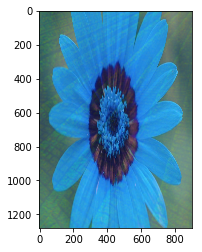

In [15]:
img1 = cv2.imread("Strong-Lines-San-Francisco.jpg") 
img2 = cv2.imread("flowers.jpg")
output = colourise_base_and_blur(img1,img2,"sobelY",10,0.2)
plt.imshow(output)
cv2.imwrite("testBlur.png",output)